In [2]:
import pandas as pd
import sys
import numpy as np
import os
from statistics import mean,stdev,median
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
import math
import mplhep as hep
from matplotlib.offsetbox import AnchoredText
import uproot

In [3]:
#load files

directory = '~/testbeam-analysis/'

#infile1 = uproot.open(directory+'ntuple_decoded_fpga_0_run_205_20220419_092608.root:ntuplizehgcroc/hgcroc')
#in_data1 = infile1.arrays(["raw_id","adc","i_sample","tot","toa"], library="pd")
infile2 = uproot.open(directory+'ntuple_decoded_fpga_0_run_235_20220422_072317.root:ntuplizehgcroc/hgcroc')
in_data2 = infile2.arrays(["raw_id","adc","i_sample","tot","toa"], library="pd")
#infile3 = uproot.open(directory+'ntuple_decoded_fpga_0_run_243_20220422_140024.root:ntuplizehgcroc/hgcroc')
#in_data3 = infile3.arrays(["raw_id","adc","i_sample","tot","toa"], library="pd")
#infile4 = uproot.open(directory+'ntuple_decoded_fpga_0_run_241_20220422_112624.root:ntuplizehgcroc/hgcroc')
#in_data4 = infile4.arrays(["raw_id","adc","i_sample","tot","toa"], library="pd")
in_data = [in_data2]
in_pedestals = pd.read_csv(directory+'pedestals_20220426.csv', comment='#')
in_table = pd.read_csv(directory+'testbeam_connections.csv')
in_mip = pd.read_csv(directory+'mip_run224.csv')

In [4]:
#define layers and bars
det_id_layers1 = []
det_id_layers1.append([0x18800100,0x18800101,0x18800102,0x18800103,0x18800104,0x18800105,0x18800106,0x18800107])
det_id_layers1.append([0x18800200,0x18800201,0x18800202,0x18800203,0x18800204,0x18800205,0x18800206,0x18800207])
det_id_layers1.append([0x18800400,0x18800401,0x18800402,0x18800403,0x18800404,0x18800405,0x18800406,0x18800407])
det_id_layers1.append([0x18800600,0x18800601,0x18800602,0x18800603,0x18800604,0x18800605,0x18800606,0x18800607])
det_id_layers1.append([0x18800800,0x18800801,0x18800802,0x18800803,0x18800804,0x18800805,0x18800806,0x18800807])

det_id_layers0 = []
det_id_layers0.append([0x18880100,0x18880101,0x18880102,0x18880103,0x18880104,0x18880105,0x18880106,0x18880107])
det_id_layers0.append([0x18880200,0x18880201,0x18880202,0x18880203,0x18880204,0x18880205,0x18880206,0x18880207])
det_id_layers0.append([0x18880400,0x18880401,0x18880402,0x18880403,0x18880404,0x18880405,0x18880406,0x18880407])
det_id_layers0.append([0x18880600,0x18880601,0x18880602,0x18880603,0x18880604,0x18880605,0x18880606,0x18880607])
det_id_layers0.append([0x18880800,0x18880801,0x18880802,0x18880803,0x18880804,0x18880805,0x18880806,0x18880807])

layer_index = [0,1,2,3,4]
bars = [0,1,2,3,4,5,6,7]

In [5]:
#find events in layer 1 that have MIP hits
good_events = []
good_events2 = []
has_one_mip = []
has_greater_than_one = []
adcs = []
event_list = []
for o in range(1):
    temp_has_one_mip = []
    temp_has_greater_than_one = []
    temp_adcs = []
    temp_event_list = []
    print('dataset',o)
    for u in range(len(det_id_layers1[0])):
        ttemp_has_one_mip = []
        ttemp_has_greater_than_one = []
        ttemp_adcs = []
        print('bar',u)
        is_channel_and_link0 = (in_data[o]['raw_id']==int(det_id_layers0[0][u]))    #grab relevant data by channel for link 0
        data_notlist0 = in_data[o][is_channel_and_link0]
        data0 = data_notlist0.values.tolist()
        
        is_channel_and_link1 = (in_data[o]['raw_id']==int(det_id_layers1[0][u]))    #grab relevant data by channel for link 1
        data_notlist1 = in_data[o][is_channel_and_link1]
        data1 = data_notlist1.values.tolist()
        
        pedestals0=1
        try:
            is_pedestal0 = (in_pedestals['DetID']==hex(det_id_layers0[0][u]))   #grab pedestal information for link 0
            pedestal_list0 = in_pedestals[is_pedestal0].values.tolist()
            pedestals0 = pedestal_list0[0][1]
        except IndexError:
            pedestals0=100
        
        pedestals1=1
        try:
            is_pedestal1 = (in_pedestals['DetID']==hex(det_id_layers1[0][u]))   #grab pedestal information for link 1
            pedestal_list1 = in_pedestals[is_pedestal1].values.tolist()
            pedestals1 = pedestal_list1[0][1]
        except IndexError:
            pedestals1=100
        
        mips0=1
        mips0_width=1
        try:
            is_mip0 = (in_mip['DetID']==hex(det_id_layers0[0][u]))  #grab MIP data by channel for link 0 (mask)
            mip_list0 = in_mip[is_mip0].values.tolist() 
            mips0 = mip_list0[0][1]
            mips0_width = mip_list0[0][2]
        except IndexError:
            mips0=400
            mips0_width=100
        
        mips1=1
        mips1_width=1
        try:
            is_mip1 = (in_mip['DetID']==hex(det_id_layers1[0][u]))  #grab MIP data by channel for link 1
            mip_list1 = in_mip[is_mip1].values.tolist()
            mips1 = mip_list1[0][1]
            mips1_width = mip_list1[0][2]
        except IndexError:
            mips1=400
            mips1_width=100
    
        counter = 0
        len_data0 = len(data0)
        for j in range(int(len_data0/8)):
            temp_adc0 = []
            temp_adc1 = []
            bad_event = 0
            for k in range(8):
                if(k!=0):
                    temp_adc0.append(data0[counter][1]-pedestals0)
                    temp_adc1.append(data1[counter][1]-pedestals1) 
                counter = counter + 1
            sum_adc0 = sum(temp_adc0)
            minmip0 = mips0-mips0_width
            maxmip0 = mips0+mips0_width
            sum_adc1 = sum(temp_adc1)
            minmip1 = mips1-mips1_width
            maxmip1 = mips1+mips1_width
            ttemp_adcs.append(mean([sum_adc0/mips0,sum_adc1/mips1]))
            temp_event_list.append(j)
            if(sum_adc0>maxmip0 or sum_adc1>maxmip1):
                ttemp_has_greater_than_one.append(1)
            else:
                ttemp_has_greater_than_one.append(0)
            if(sum_adc0>=minmip0 and sum_adc0<=maxmip0 and sum_adc1>=minmip1 and sum_adc1<=maxmip1):
                ttemp_has_one_mip.append(1)
            else:
                ttemp_has_one_mip.append(0)
        temp_has_greater_than_one.append(ttemp_has_greater_than_one)
        temp_has_one_mip.append(ttemp_has_one_mip)
        temp_adcs.append(ttemp_adcs)
    has_greater_than_one.append(temp_has_greater_than_one)
    has_one_mip.append(temp_has_one_mip)
    adcs.append(temp_adcs)
    event_list.append(temp_event_list)

dataset 0
bar 0
bar 1
bar 2
bar 3
bar 4
bar 5
bar 6
bar 7


In [5]:
has_one_mip

[[[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0

In [6]:
#filter only events that have one MIP across all bars in the layer
good_adcs = []
for o in range(1):
    temp_good_adcs = []
    temp_good_events = []
    for i in range(len(det_id_layers0[0])):
        temp_good_adcs.append([])

    for i in range(len(has_greater_than_one[o][0])):
        h_o_m = 0
        g_t_o = 0
        for j in range(len(det_id_layers0[0])):
            if(has_one_mip[o][j][i]>0):
                h_o_m = h_o_m + 1
            if(has_greater_than_one[o][j][i]!=0):
                g_t_o = g_t_o +1
        if(g_t_o!=0):
            continue
        if(h_o_m==1):
            temp_good_events.append(event_list[o][i])
            for j in range(len(det_id_layers0[0])):
                temp_good_adcs[j].append(adcs[o][j][i])
    good_adcs.append(temp_good_adcs)
    good_events.append(temp_good_events)

In [ ]:
good_adcs

: 

89535


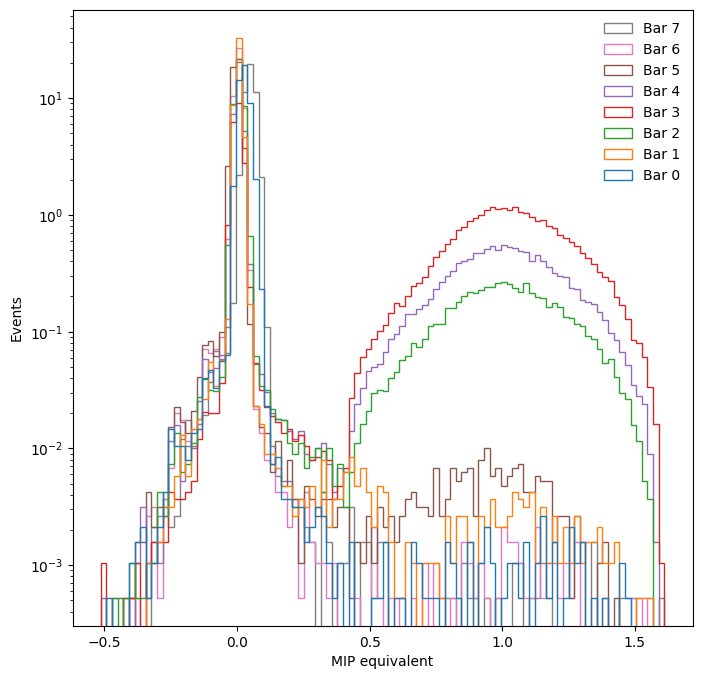

In [7]:
#make pretty plots
for o in range(1):
    fig,ax = plt.subplots(figsize=(8, 8))
    n2, bins2, patches2 = ax.hist(good_adcs[o],100, stacked=False,histtype='step',density=True,label=['Bar 0','Bar 1','Bar 2','Bar 3','Bar 4','Bar 5','Bar 6','Bar 7'])
    ax.set_xlabel('MIP equivalent')
    ax.set_ylabel('Events')
    ax.legend(frameon=False)
    plt.yscale('log')
    ##plt.savefig('~/testbeam-analysis/all_bars_test_layer_dataset'+str(o)+'.pdf',bbox_inches='tight')
    print(len(good_events[o]))

In [7]:
#find mip hits in horizontal layers where there was a MIP hit in layer 1
t_has_one_mip = []
t_has_greater_than_one = []
t_event_list = []

for i in range(len(layer_index)):
    if(i==0):
        continue
    print('layer',i+1)
    l_has_one_mip = []
    l_has_greater_than_one = []
    l_event_list = []
    for o in range(1):
        temp_has_one_mip = []
        temp_has_greater_than_one = []
        temp_event_list = []
        print('dataset',o)
        for u in range(len(det_id_layers1[0])):
            ttemp_has_one_mip = []
            ttemp_has_greater_than_one = []
            print('bar',u)
            is_channel_and_link0 = (in_data[o]['raw_id']==int(det_id_layers0[i][u]))
            data_notlist0 = in_data[o][is_channel_and_link0]
            data0 = data_notlist0.values.tolist()
        
            is_channel_and_link1 = (in_data[o]['raw_id']==int(det_id_layers1[i][u]))
            data_notlist1 = in_data[o][is_channel_and_link1]
            data1 = data_notlist1.values.tolist()
        
            pedestals0=1
            try:
                is_pedestal0 = (in_pedestals['DetID']==hex(det_id_layers0[i][u]))
                pedestal_list0 = in_pedestals[is_pedestal0].values.tolist()
                pedestals0 = pedestal_list0[0][1]
            except IndexError:
                pedestals0=100
        
            pedestals1=1
            try:
                is_pedestal1 = (in_pedestals['DetID']==hex(det_id_layers1[i][u]))
                pedestal_list1 = in_pedestals[is_pedestal1].values.tolist()
                pedestals1 = pedestal_list1[0][1]
            except IndexError:
                pedestals1=100
        
            mips0=1
            mips0_width=1
            try:
                is_mip0 = (in_mip['DetID']==hex(det_id_layers0[i][u]))
                mip_list0 = in_mip[is_mip0].values.tolist()
                mips0 = mip_list0[0][1]
                mips0_width = mip_list0[0][2]
            except IndexError:
                mips0=400
                mips0_width=100
        
            mips1=1
            mips1_width=1
            try:
                is_mip1 = (in_mip['DetID']==hex(det_id_layers1[i][u]))
                mip_list1 = in_mip[is_mip1].values.tolist()
                mips1 = mip_list1[0][1]
                mips1_width = mip_list1[0][2]
            except IndexError:
                mips1=400
                mips1_width=100
    
            counter = 0
            print(len(data0))
            len_data0 = len(data0)
            for j in range(len(good_events[o])):
                counter = good_events[o][j]*8
                temp_adc0 = []
                temp_adc1 = []
                bad_event = 0
                for k in range(8):
                    if(k!=0):
                        temp_adc0.append(data0[counter][1]-pedestals0)
                        temp_adc1.append(data1[counter][1]-pedestals1) 
                    counter = counter + 1
                #if(bad_event != 0):
                #    continue 
                sum_adc0 = sum(temp_adc0)
                minmip0 = mips0-mips0_width
                maxmip0 = mips0+mips0_width
                sum_adc1 = sum(temp_adc1)
                minmip1 = mips1-mips1_width
                maxmip1 = mips1+mips1_width
                temp_event_list.append(j)
                if(sum_adc0>maxmip0 or sum_adc1>maxmip1):
                    ttemp_has_greater_than_one.append(1)
                else:
                    ttemp_has_greater_than_one.append(0)
                if(sum_adc0>=minmip0 and sum_adc0<=maxmip0 and sum_adc1>=minmip1 and sum_adc1<=maxmip1):
                    ttemp_has_one_mip.append(1)
                else:
                    ttemp_has_one_mip.append(0)
            temp_has_greater_than_one.append(ttemp_has_greater_than_one)
            temp_has_one_mip.append(ttemp_has_one_mip)
        l_has_greater_than_one.append(temp_has_greater_than_one)
        l_has_one_mip.append(temp_has_one_mip)
        l_event_list.append(temp_event_list)
    t_has_greater_than_one.append(l_has_greater_than_one)
    t_has_one_mip.append(l_has_one_mip)
    t_event_list.append(l_event_list)

layer 2
dataset 0
bar 0
808056
bar 1
808056
bar 2
808056
bar 3
808056
bar 4
808056
bar 5
808056
bar 6
808056
bar 7
808056
layer 3
dataset 0
bar 0
808056
bar 1
808056
bar 2
808056
bar 3
808056
bar 4
808056
bar 5
808056
bar 6
808056
bar 7
808056
layer 4
dataset 0
bar 0
808056
bar 1
808056
bar 2
808056
bar 3
808056
bar 4
808056
bar 5
808056
bar 6
808056
bar 7
808056
layer 5
dataset 0
bar 0
808056
bar 1
808056
bar 2
808056
bar 3
808056
bar 4
808056
bar 5
808056
bar 6
808056
bar 7
808056


In [8]:
#select events where there is only one MIP hit in the layer
t_good_events = []
for i in range(len(layer_index)-1):
    l_good_events = []
    for o in range(1):
        temp_good_events = []
        print(i,o)
        for j in range(len(t_has_greater_than_one[i][o][0])):
            h_o_m = 0
            g_t_o = 0
            for k in range(len(det_id_layers0[0])):
                if(t_has_one_mip[i][o][k][j]>0):
                    h_o_m = h_o_m + 1
                if(t_has_greater_than_one[i][o][k][j]!=0):
                    g_t_o = g_t_o +1
            if(g_t_o!=0):
                continue
            if(h_o_m==1):
                temp_good_events.append(t_event_list[i][o][j])
        l_good_events.append(temp_good_events)
    t_good_events.append(l_good_events)
import pickle
with open('toa_diff_good.pickle', 'wb') as fp:
    pickle.dump(t_good_events, fp)

0 0
1 0
2 0
3 0


In [9]:
#loop over good events and get info we want (pickled)
import pickle
t_good_events = []
with open('toa_diff_good.pickle', 'rb') as fp:
    t_good_events = pickle.load(fp)

from statistics import NormalDist
import scipy.stats as stats
import math

training_list = []
testing_list = []
raw_training_list = []
raw_testing_list = []

target = [0,30,45,60]

for i in range(len(layer_index)):
    if(i==0):
        continue
    print('layer',i+1)
    for b in range(len(bars)):
        good_toa_diff = []
        good_adc_diff = []
        good_adc_sum_diff = []
        print('bar',bars[b])
        for o in range(1):
            print('dataset',o)
            temp_toa_diff = []
            temp_adc_diff = []
            temp_adc_sum_diff = []

            is_channel_and_link0 = (in_data[o]['raw_id']==int(det_id_layers0[i][bars[b]]))
            data_notlist0 = in_data[o][is_channel_and_link0]
            data0 = data_notlist0.values.tolist()

            is_channel_and_link1 = (in_data[o]['raw_id']==int(det_id_layers1[i][bars[b]]))
            data_notlist1 = in_data[o][is_channel_and_link1]
            data1 = data_notlist1.values.tolist()
            
            pedestals0=1
            try:
                is_pedestal0 = (in_pedestals['DetID']==hex(det_id_layers0[i][bars[b]]))
                pedestal_list0 = in_pedestals[is_pedestal0].values.tolist()
                pedestals0 = pedestal_list0[0][1]
            except IndexError:
                try:
                    is_pedestal1 = (in_pedestals['DetID']==hex(det_id_layers1[i][bars[b]]))
                    pedestal_list1 = in_pedestals[is_pedestal1].values.tolist()
                    pedestals0 = pedestal_list1[0][1]
                except IndexError:
                    pedestals0=100
        
            pedestals1=1
            try:
                is_pedestal1 = (in_pedestals['DetID']==hex(det_id_layers1[i][bars[b]]))
                pedestal_list1 = in_pedestals[is_pedestal1].values.tolist()
                pedestals1 = pedestal_list1[0][1]
            except IndexError:
                try:
                    is_pedestal0 = (in_pedestals['DetID']==hex(det_id_layers0[i][bars[b]]))
                    pedestal_list0 = in_pedestals[is_pedestal0].values.tolist()
                    pedestals1 = pedestal_list0[0][1]
                except IndexError:
                    pedestals1=100
        
            mips0=1
            mips0_width=1
            try:
                is_mip0 = (in_mip['DetID']==hex(det_id_layers0[i][bars[b]]))
                mip_list0 = in_mip[is_mip0].values.tolist()
                mips0 = mip_list0[0][1]
                mips0_width = mip_list0[0][2]
            except IndexError:
                try:
                    is_mip1 = (in_mip['DetID']==hex(det_id_layers1[i][bars[b]]))
                    mip_list1 = in_mip[is_mip1].values.tolist()
                    mips0 = mip_list1[0][1]
                    mips0_width = mip_list1[0][2]
                except IndexError:
                    mips0=400
                    mips0_width=100
                    print('no mip in side 0')
        
            mips1=1
            mips1_width=1
            try:
                is_mip1 = (in_mip['DetID']==hex(det_id_layers1[i][bars[b]]))
                mip_list1 = in_mip[is_mip1].values.tolist()
                mips1 = mip_list1[0][1]
                mips1_width = mip_list1[0][2]
            except IndexError:
                try:
                    is_mip0 = (in_mip['DetID']==hex(det_id_layers0[i][bars[b]]))
                    mip_list0 = in_mip[is_mip0].values.tolist()
                    mips1 = mip_list0[0][1]
                    mips1_width = mip_list0[0][2]
                except IndexError:
                    mips1=400
                    mips1_width=100
                    print('no mip in side 1')
            
            len_data0 = float(len(data0))
            len_data1 = float(len(data1))
            if(len_data0 != len_data1):
                print('data lengths are not the same!!')
                continue
            toas0 = []
            toas1 = []
            adcs0 = []
            adcs1 = []
            adcs_sum0 = []
            adcs_sum1 = []
            for j in range(len(t_good_events[i-1][o])):
                counter = t_good_events[i-1][o][j]*8
                toa0 = 0
                temp_adc0 = []
                toa1 = 0
                temp_adc1 = []
                numone = 0
                numtwo = 0
                bx0 = 0
                bx1 = 0
                max0 = 0
                max1 = 0
                temp_toa0 = []
                temp_toa1 = []
                for k in range(8):
                    temp_toa0.append(data0[counter][4])
                    temp_toa1.append(data1[counter][4])
                    if(data0[counter][4]!=0):
                        toa0 = toa0 + ((1023-data0[counter][4])/1023)*25 + k*25
                        numone = numone+1
                        bx0 = k
                        if(data0[counter][4]>=1023):
                            max0 = 1
                    if(data1[counter][4]!=0):
                        toa1 = toa1 + ((1023-data1[counter][4])/1023)*25 + k*25
                        numtwo = numtwo+1
                        bx1 = k
                        if(data1[counter][4]>=1023):
                            max1 = 1
                    if(k!=0):
                        temp_adc0.append(data0[counter][1]-pedestals0)
                        temp_adc1.append(data1[counter][1]-pedestals1) 
                    counter = counter + 1
                if(numone!=1 or numtwo!=1):
                    continue
                sum_adc0 = sum(temp_adc0)
                minmip0 = mips0-mips0_width
                maxmip0 = mips0+mips0_width
                sum_adc1 = sum(temp_adc1)
                minmip1 = mips1-mips1_width
                maxmip1 = mips1+mips1_width
                if(sum_adc0>maxmip0 or sum_adc1>maxmip1):
                    continue
                if(sum_adc0<minmip0 or sum_adc1<minmip1):
                    continue                
                adcs_sum0.append(sum(temp_adc0)/mips0)
                adcs_sum1.append(sum(temp_adc1)/mips1)
                adcs0.append(max(temp_adc0))
                toas0.append(toa0)
                adcs1.append(max(temp_adc1))
                toas1.append(toa1)
                temp_list = []
                for k in range(len(temp_adc0)):
                    temp_list.append(temp_adc0[k])
                for k in range(len(temp_adc1)):
                    temp_list.append(temp_adc1[k])
                for k in range(len(temp_toa0)):
                    temp_list.append(temp_toa0[k])
                for k in range(len(temp_toa1)):
                    temp_list.append(temp_toa1[k])
                raw_training_list.append(temp_list)
                raw_testing_list.append(target[o])
                training_list.append([toa0-toa1,max(temp_adc0)-max(temp_adc1),(sum(temp_adc0)/mips0)-(sum(temp_adc1)/mips1),sum(temp_adc0)-sum(temp_adc1),toa0,toa1,sum(temp_adc0),sum(temp_adc1),i,b])
                testing_list.append(target[o])

layer 2
bar 0
dataset 0
bar 1
dataset 0
bar 2
dataset 0
bar 3
dataset 0
bar 4
dataset 0
bar 5
dataset 0
bar 6
dataset 0
bar 7
dataset 0
layer 3
bar 0
dataset 0
bar 1
dataset 0
bar 2
dataset 0
bar 3
dataset 0
bar 4
dataset 0
bar 5
dataset 0
bar 6
dataset 0
bar 7
dataset 0
layer 4
bar 0
dataset 0
bar 1
dataset 0
bar 2
dataset 0
bar 3
dataset 0
bar 4
dataset 0
bar 5
dataset 0
bar 6
dataset 0
bar 7
dataset 0
layer 5
bar 0
dataset 0
bar 1
dataset 0
bar 2
dataset 0
bar 3
dataset 0
bar 4
dataset 0
bar 5
dataset 0
bar 6
dataset 0
bar 7
dataset 0


In [10]:
# clear up memory
del in_data

In [11]:
#####################DUMP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

with open('toa_train_2.pickle', 'wb') as fpp:
    pickle.dump(training_list, fpp,protocol=2)
with open('toa_test_2.pickle', 'wb') as fppp:
    pickle.dump(testing_list, fppp,protocol=2)
    
with open('raw_toa_train_2.pickle', 'wb') as fpppp:
    pickle.dump(raw_training_list, fpppp,protocol=2)
with open('raw_toa_test_2.pickle', 'wb') as fppppp:
    pickle.dump(raw_testing_list, fppppp,protocol=2)

In [ ]:
###############################OPEN!!!!!

import pickle
training_list = []
with open('toa_train.pickle', 'rb') as fp:
    training_list = pickle.load(fp)
testing_list = []
with open('toa_test.pickle', 'rb') as fpp:
    testing_list = pickle.load(fpp)
    
raw_training_list = []
with open('raw_toa_train.pickle', 'rb') as fppp:
    raw_training_list = pickle.load(fppp)
raw_testing_list = []
with open('raw_toa_test.pickle', 'rb') as fpppp:
    raw_testing_list = pickle.load(fpppp)

: 